# Example of Text-to-Image and Image-to-Text Generation
## Featuring: Stable Diffusion XL (TtoI) and ViT-GPT2 (ItoT)

A small example of generating images from text and back again...

**Important:** You must be have an Nvidia GPU and working CUDA installation to run this code!

### Install the preprequisites

In [1]:
! pip install --user diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.0 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
! pip install --user invisible_watermark transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 71.1 MB/s eta 0:00:00:00:0100:01


### Set up the Text to Image Pipeline

In [8]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "An alien driving a taxi to the Eiffel tower"

images = pipe(prompt=prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

And what do you get?

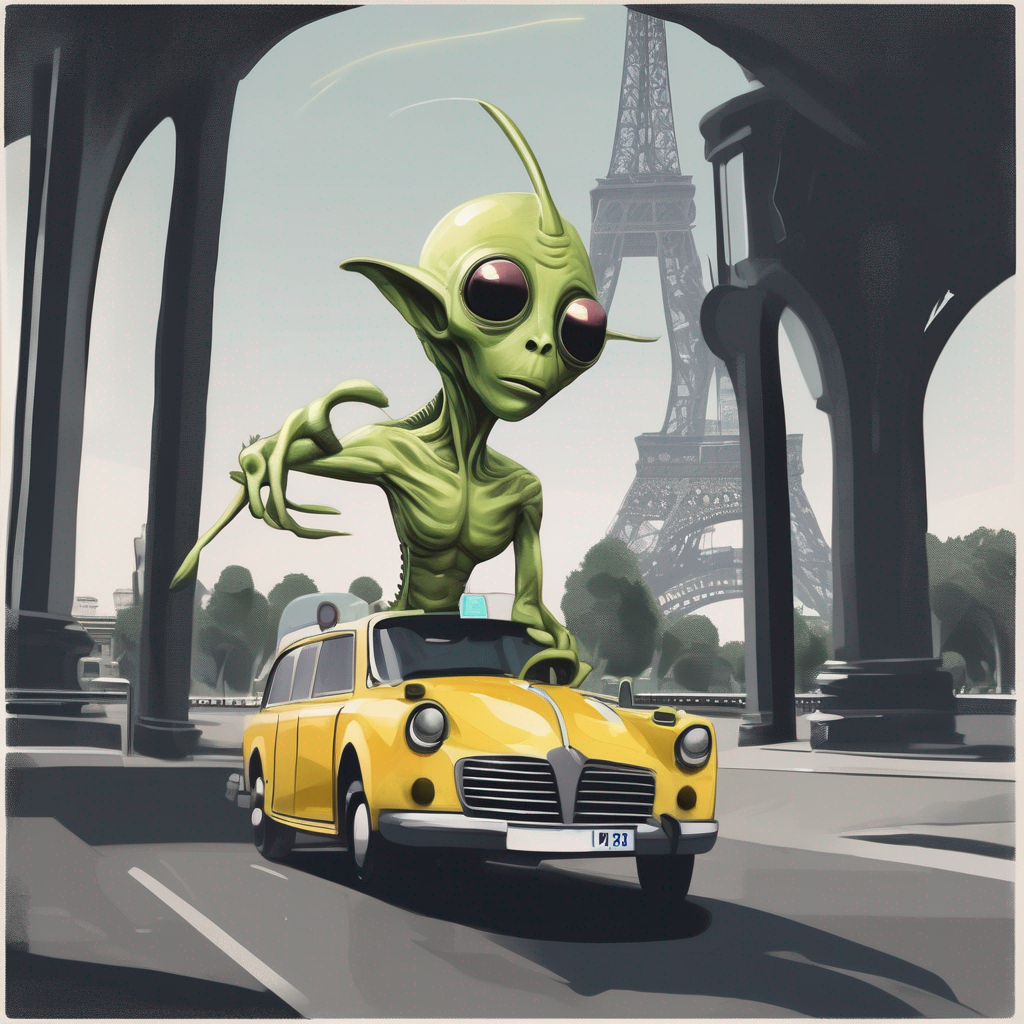

In [9]:
display(images)

In [10]:
images.save("image.png")

May require restarting the kernel if you run out of memory...

### Set up the Image to Text Pipeline

In [11]:
from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("image.png")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'generated_text': 'a cartoon character is riding a yellow car '}]

Makes sense...